# COGS 108 - Final Project - Predicting Football Player Transfer Net Worth

## Project video link 

https://drive.google.com/file/d/1y2cNkGMOiTKBft5FzNFf4VvXuK8RukMs/view?usp=sharing

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [  ] NO - keep private

# Overview

Our project aims to delve into the exciting world of football, with a specific focus on player valuations, a key component of today's commercialized sports landscape. We are particularly interested in examining and predicting player net worth in the transfer market, a subject that hasn't been thoroughly explored in the past.

# Names

- Yilin Song
- Cheng Qian
- Justin He
- Runze Wang
- Xiaohui Lu

<a id='research_question'></a>
# Research Question

To what extent do the attributes of FIFA players (overall rating, potential, preferred foot, attacking work rate, defensive work rate, crossing, finishing, etc.) correlate with their real-life transfer net worth as determined by data scraped from transfermarkt?

<a id='background'></a>

## Background & Prior Work

The emergence of comprehensive player databases in recent years has opened up exciting possibilities for exploring the relationships between player attributes and various metrics of interest in the world of sports. While previous research has focused on predicting player overall ratings for upcoming years[^1] and even forecasting the outcomes of global tournaments like the World Cup[^2], very limited attention has been given to examining the connection between these player attributes and their net worth in the transfer market. With sports becoming increasingly commercialized, player valuation has become a topic of great interest and importance for fans, scouts, agents, and other stakeholders in the sports industry. Thus, our project aims to uncover the underlying relationship between player net worth and the associated attributes. Additionally, we will develop a prediction model using machine learning techniques to estimate net worth based on player attributes. By doing so, we aspire to provide valuable insights that can inform better decision-making processes in the sports industry.

References:

[^1]: Marques, M. (2020, February 6). FIFA 21 player’s overall prediction https://towardsdatascience.com/fifa-21-players-overall-prediction-3b6171f90a9b

[^2]: Asad, H. (2022, December 2). Unsupervised Machine Learning on Player Attributes from International Teams Participating in FIFA World Cup 2022 https://content.dsp.co.uk/unsupervised-machine-learning-on-player-attributes-from-international-teams-participating-in-fifa-world-cup-2022


# Hypothesis


We predict that player attributes such as the overall rating, potential, preferred foot, attacking work rate, defensive work rate, crossing, finishing, etc. will significantly contribute to predicting the percentile range of a player's net worth in the transfer market, even though there are obviously other external factors like market demand, club finances and even global economic conditions which can also influence player valuations.

# Dataset(s)

Dataset Name: Football Data from Transfermarket
- Link to the dataset: https://www.kaggle.com/datasets/davidcariboo/player-scores?select=players.csv 
- Number of observations: 28,504
- Description of the dataset: This dataset contains the list of the football player’s club, position, valuation, competition, games and appearance. And the dataset would be updated every week. However, we'll only be using the valuation dataset which contains transfer market networth of players starting from the year 2003 to 2023.


Dataset Name: European Soccer Database
- Link to the dataset: https://www.kaggle.com/datasets/hugomathien/soccer 
- Number of observations: +10,000 players
- Description of the dataset: This dataset contains the list of the football player’s Attributes(overall_rating, potential, preferred_foot, attacking_work_rate, defensive_work_rate, crossing,finishing, heading_accuracy, short_passing, volleys, dribbling) given by FIFA. The dataset contains the attribute ratings for European players starting from the year 2008 to 2016.

# Setup

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

By using SQLiteStudio (https://sqlitestudio.pl/), We managed to download the tool for converting sqlite file into csv file. After importing the sqlite file into the tool, We export each table (player & player attributes) into csv keeping their column names as the first row. Our following data cleaning steps are based on the converted csv files instead of the sqlite file.

In [2]:
# Import the player attributes data without player names,which only has player ID
player_attributes = pd.read_csv("play_attributes.csv")
player_attributes.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [3]:
# Import dataset has player names with matching id
player = pd.read_csv("player.csv")
player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [4]:
# Import player net worth valuations
player_eval = pd.read_csv("players.csv")
player_eval.shape

(28503, 23)

In [5]:
# Import club data
clubs = pd.read_csv("clubs.csv")
clubs.shape

(411, 16)

In [6]:
player_eval = player_eval.merge(clubs, left_on='current_club_id', right_on='club_id', how='left')
player_eval.shape

(28503, 39)

In [7]:
# Merge player attributes with player name by using the same matching id. Merging the redundant
# information to improve data quality. By merging these datasets together, we'll be able to have
# each player name have corresponding player attributes, which will later be useful for us to
# then merge together player networth and player attributes, as we ultimately want to have player
# networth and player attributes in the same dataframe so that we could carry out our data analysis.
merged_df = pd.merge(player, player_attributes, on='player_fifa_api_id')
merged_df.head()

,id_x,player_api_id_x,player_name,player_fifa_api_id,birthday,height,weight,id_y,player_api_id_y,date,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1,505942,2016-02-18 00:00:00,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2,505942,2015-11-19 00:00:00,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,3,505942,2015-09-21 00:00:00,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,4,505942,2015-03-20 00:00:00,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,5,505942,2007-02-22 00:00:00,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [8]:
# Only keep the player evaluation file's related columns
player_eval = player_eval[['name_x', 'market_value_in_eur', 'highest_market_value_in_eur', 'position','squad_size','average_age','foreigners_number','foreigners_percentage','national_team_players','stadium_seats']]
player_eval = player_eval.rename(columns={'name_x': 'player_name'})
player_eval.head()

,player_name,market_value_in_eur,highest_market_value_in_eur,position,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_seats
0,Ian Raeymaekers,NaN,50000.0,Attack,0,NaN,0,NaN,0,12000
1,Mohamed Camara,NaN,300000.0,Attack,28,25.3,14,50.0,4,21877
2,Pablo Olivera,25000.0,600000.0,Attack,25,26.6,16,64.0,1,6153
3,Aliosman Aydin,NaN,125000.0,Attack,29,25.9,12,41.4,2,54600
4,Jaime Alfonso Ruiz,NaN,1700000.0,Attack,30,24.3,10,33.3,4,16672


In [9]:
# Merge the networth and attributes with matching names and drop the non-overlaping player rows
# as we want to avoid having multiple data points representing the same individual, which helps
# us maintain the assumption of randomness and reduce the potential for confounding variables in
# the future.
final_df = pd.merge(merged_df, player_eval, on='player_name', how='inner')
final_df.head()

,id_x,player_api_id_x,player_name,player_fifa_api_id,birthday,height,weight,id_y,player_api_id_y,date,...,gk_reflexes,market_value_in_eur,highest_market_value_in_eur,position,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_seats
0,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146,6,155782,2016-04-21 00:00:00,...,12.0,2500000.0,12000000.0,Defender,23,28.0,17,73.9,13,62500
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146,7,155782,2016-04-07 00:00:00,...,12.0,2500000.0,12000000.0,Defender,23,28.0,17,73.9,13,62500
2,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146,8,155782,2016-01-07 00:00:00,...,12.0,2500000.0,12000000.0,Defender,23,28.0,17,73.9,13,62500
3,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146,9,155782,2015-12-24 00:00:00,...,12.0,2500000.0,12000000.0,Defender,23,28.0,17,73.9,13,62500
4,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146,10,155782,2015-12-17 00:00:00,...,12.0,2500000.0,12000000.0,Defender,23,28.0,17,73.9,13,62500


In [10]:
# Drop player rows with no net worth evaluation data
final_df = final_df.dropna(subset=['market_value_in_eur','market_value_in_eur'])
final_df.head()

,id_x,player_api_id_x,player_name,player_fifa_api_id,birthday,height,weight,id_y,player_api_id_y,date,...,gk_reflexes,market_value_in_eur,highest_market_value_in_eur,position,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_seats
0,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146,6,155782,2016-04-21 00:00:00,...,12.0,2500000.0,12000000.0,Defender,23,28.0,17,73.9,13,62500
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146,7,155782,2016-04-07 00:00:00,...,12.0,2500000.0,12000000.0,Defender,23,28.0,17,73.9,13,62500
2,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146,8,155782,2016-01-07 00:00:00,...,12.0,2500000.0,12000000.0,Defender,23,28.0,17,73.9,13,62500
3,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146,9,155782,2015-12-24 00:00:00,...,12.0,2500000.0,12000000.0,Defender,23,28.0,17,73.9,13,62500
4,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146,10,155782,2015-12-17 00:00:00,...,12.0,2500000.0,12000000.0,Defender,23,28.0,17,73.9,13,62500


In [11]:
# We noticed there are some rows with duplicated names, so we drop the duplicated players
final_df = final_df.drop_duplicates(subset='player_name')
final_df.head()

,id_x,player_api_id_x,player_name,player_fifa_api_id,birthday,height,weight,id_y,player_api_id_y,date,...,gk_reflexes,market_value_in_eur,highest_market_value_in_eur,position,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_seats
0,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146,6,155782,2016-04-21 00:00:00,...,12.0,2500000.0,12000000.0,Defender,23,28.0,17,73.9,13,62500
33,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163,39,162549,2016-01-07 00:00:00,...,13.0,275000.0,550000.0,Midfield,26,24.5,9,34.6,0,7750
151,10,101042,Aaron Meijers,188621,1987-10-28 00:00:00,175.26,170,180,101042,2015-12-03 00:00:00,...,15.0,250000.0,1000000.0,Defender,24,26.2,9,37.5,1,11026
170,12,231592,Aaron Mooy,194958,1990-09-15 00:00:00,175.26,150,207,231592,2016-02-04 00:00:00,...,12.0,4000000.0,14000000.0,Midfield,30,25.7,22,73.3,17,60832
198,13,163222,Aaron Muirhead,213568,1990-08-30 00:00:00,187.96,168,235,163222,2014-09-18 00:00:00,...,7.0,225000.0,250000.0,Defender,19,27.9,1,5.3,0,10102


# Data Cleaning

For the future analysis, we decide to change the related attributes columns with string value into categorical value. In this way, converting to categorical values will make our dataset more understandable and easier to visualize.

In [12]:
# Turn preferred foot column (string value) into integer categorical value
final_df['preferred_foot'] = pd.Categorical(final_df['preferred_foot'])
final_df['preferred_foot'] = final_df['preferred_foot'].cat.codes

# Turn attacking_work_rate column (string value) into integer categorical value
final_df['attacking_work_rate'] = pd.Categorical(final_df['attacking_work_rate'])
final_df['attacking_work_rate'] = final_df['attacking_work_rate'].cat.codes

# Turn defensive_work_rate column (string value) into integer categorical value
final_df['defensive_work_rate'] = pd.Categorical(final_df['defensive_work_rate'])
final_df['defensive_work_rate'] = final_df['defensive_work_rate'].cat.codes
final_df.head()

,id_x,player_api_id_x,player_name,player_fifa_api_id,birthday,height,weight,id_y,player_api_id_y,date,...,gk_reflexes,market_value_in_eur,highest_market_value_in_eur,position,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_seats
0,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146,6,155782,2016-04-21 00:00:00,...,12.0,2500000.0,12000000.0,Defender,23,28.0,17,73.9,13,62500
33,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163,39,162549,2016-01-07 00:00:00,...,13.0,275000.0,550000.0,Midfield,26,24.5,9,34.6,0,7750
151,10,101042,Aaron Meijers,188621,1987-10-28 00:00:00,175.26,170,180,101042,2015-12-03 00:00:00,...,15.0,250000.0,1000000.0,Defender,24,26.2,9,37.5,1,11026
170,12,231592,Aaron Mooy,194958,1990-09-15 00:00:00,175.26,150,207,231592,2016-02-04 00:00:00,...,12.0,4000000.0,14000000.0,Midfield,30,25.7,22,73.3,17,60832
198,13,163222,Aaron Muirhead,213568,1990-08-30 00:00:00,187.96,168,235,163222,2014-09-18 00:00:00,...,7.0,225000.0,250000.0,Defender,19,27.9,1,5.3,0,10102


In [13]:
# Turn birthday column into datatime value
final_df['birthday'] = pd.to_datetime(final_df['birthday'])

# based on current date and time, calculate the current age of each player
current_date = datetime.now()
final_df['birthday'] = (current_date - final_df['birthday']).astype('<m8[Y]')
final_df = final_df.rename(columns={'birthday': 'age'})
final_df.head()

,id_x,player_api_id_x,player_name,player_fifa_api_id,age,height,weight,id_y,player_api_id_y,date,...,gk_reflexes,market_value_in_eur,highest_market_value_in_eur,position,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_seats
0,2,155782,Aaron Cresswell,189615,33.0,170.18,146,6,155782,2016-04-21 00:00:00,...,12.0,2500000.0,12000000.0,Defender,23,28.0,17,73.9,13,62500
33,3,162549,Aaron Doran,186170,32.0,170.18,163,39,162549,2016-01-07 00:00:00,...,13.0,275000.0,550000.0,Midfield,26,24.5,9,34.6,0,7750
151,10,101042,Aaron Meijers,188621,35.0,175.26,170,180,101042,2015-12-03 00:00:00,...,15.0,250000.0,1000000.0,Defender,24,26.2,9,37.5,1,11026
170,12,231592,Aaron Mooy,194958,32.0,175.26,150,207,231592,2016-02-04 00:00:00,...,12.0,4000000.0,14000000.0,Midfield,30,25.7,22,73.3,17,60832
198,13,163222,Aaron Muirhead,213568,32.0,187.96,168,235,163222,2014-09-18 00:00:00,...,7.0,225000.0,250000.0,Defender,19,27.9,1,5.3,0,10102


In [14]:
# Drop irrelavent columns
#columns_to_drop = ['player_fifa_api_id_x', 'player_api_id_x','player_api_id_y','player_fifa_api_id_y','id','date']
columns_to_drop = [ 'player_api_id_x','player_api_id_y','date','player_fifa_api_id']
final_df.drop(columns=columns_to_drop, inplace=True)
final_df.head()

,id_x,player_name,age,height,weight,id_y,overall_rating,potential,preferred_foot,attacking_work_rate,...,gk_reflexes,market_value_in_eur,highest_market_value_in_eur,position,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_seats
0,2,Aaron Cresswell,33.0,170.18,146,6,74.0,76.0,0,1,...,12.0,2500000.0,12000000.0,Defender,23,28.0,17,73.9,13,62500
33,3,Aaron Doran,32.0,170.18,163,39,65.0,67.0,1,4,...,13.0,275000.0,550000.0,Midfield,26,24.5,9,34.6,0,7750
151,10,Aaron Meijers,35.0,175.26,170,180,69.0,69.0,0,4,...,15.0,250000.0,1000000.0,Defender,24,26.2,9,37.5,1,11026
170,12,Aaron Mooy,32.0,175.26,150,207,75.0,78.0,1,4,...,12.0,4000000.0,14000000.0,Midfield,30,25.7,22,73.3,17,60832
198,13,Aaron Muirhead,32.0,187.96,168,235,62.0,70.0,1,4,...,7.0,225000.0,250000.0,Defender,19,27.9,1,5.3,0,10102


Now let's examine our cleaned dataset and have a sense of what we are working with

# Data Analysis & Results

# EDA

In order to find the most related attribues of the FIFA player's real-life transfer net worth, we need tp perform some exploratory data analysis to show the correlation between those attribues and the net worth.

In [13]:
# Examine the size of dataset
final_df.shape

(3309, 53)

1) Randomly chosing the attribues that may be related to the market value.

Text(0, 0.5, 'amarket_value_in_eur')

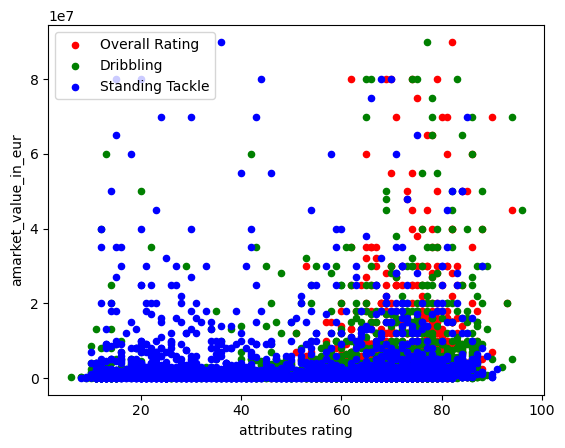

In [14]:
# Scatter plot
ax1=final_df.plot(kind='scatter', x='overall_rating', y='market_value_in_eur', color='r', label='Overall Rating')
ax2=final_df.plot(kind='scatter', x='dribbling', y='market_value_in_eur', color='g', label='Dribbling', ax=ax1)
ax3=final_df.plot(kind='scatter', x='standing_tackle', y='market_value_in_eur', color='b', label='Standing Tackle', ax=ax1)


#specify x-axis and y-axis labels
ax1.set_xlabel('attributes rating')
ax1.set_ylabel('amarket_value_in_eur')

- By randomly selecting a few attributes (Overall Rating, Dribbling, Standing tackle) and creating scatter plots against the market value, we can discern a noticeable clustering of points towards the lower end. 
- To address this, it is essential to apply a log10 transformation to the market value. This transformation can help spread out the data points more evenly and improve the interpretability of the relationship between the attributes and market value.

2) Apply the log10 transformation to the market value.

<Axes: xlabel='overall_rating', ylabel='market_log10'>

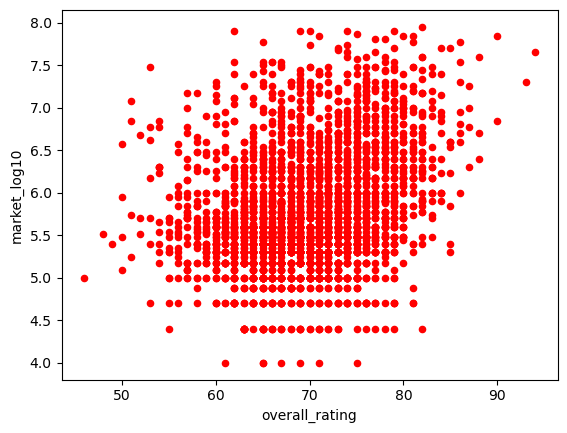

In [15]:
final_df['market_log10'] = np.log10(final_df['market_value_in_eur'])

# Scatter plot
final_df.plot(kind='scatter', x='overall_rating', y='market_log10', color='r')


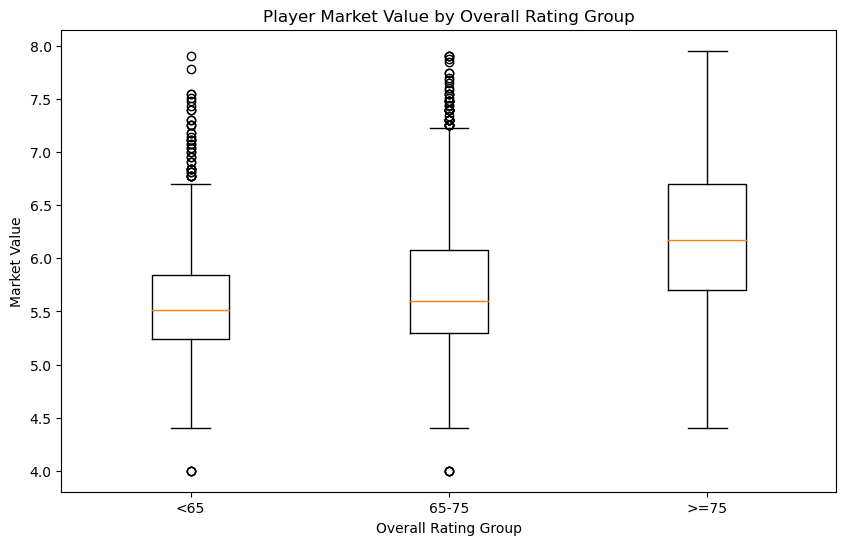

In [19]:
# Create a copy of the 'final_df' DataFrame
df_for_boxplot = final_df.copy()

# Define the rating ranges
ranges = [(0, 65), (65, 75), (75, float('inf'))]
labels = ['<65', '65-75', '>=75']

# Create a new column 'rating_group' based on the rating ranges
df_for_boxplot['rating_group'] = pd.cut(df_for_boxplot['overall_rating'], bins=[r[0] for r in ranges] + [ranges[-1][1]], labels=labels)

# Group the data by rating_group and create box plots for each group
plt.figure(figsize=(10, 6))
boxplot_data = [df_for_boxplot[df_for_boxplot['rating_group'] == label]['market_log10'] for label in labels]
plt.boxplot(boxplot_data, labels=labels)

# Set the title and labels
plt.title('Player Market Value by Overall Rating Group')
plt.xlabel('Overall Rating Group')
plt.ylabel('Market Value')

# Show the plot
plt.show()


- As one can see from the boxplot, lower quantile, median as well as upper quantile increases steadily as the overall_rating goes up.
- Following the log10 transformation, a distinct correlation emerges between the market value and overall rating. To further explore the relationships, we should now investigate the correlations among the remaining attributes. 
- However, before proceeding, it is crucial to group the players based on their positions. This separation will allow for a more accurate analysis considering the varying characteristics and demands associated with different positions in the dataset.

3) Group the players based on their positions

- Separating Players into Different Groups by Position, namely 'Attack', 'Midfield', 'Defender', and 'Goalkeeper'. 

In [20]:
# Base on player's position, separate them into different groups
final_df_attack = final_df[final_df['position'] == 'Attack']
final_df_mid = final_df[final_df['position'] == 'Midfield']
final_df_def = final_df[final_df['position'] == 'Defender']
final_df_goal = final_df[final_df['position'] == 'Goalkeeper']

- Computing Correlation Matrices, we calculates the correlation matrices for each group of players. And these correlation matrices capture the pairwise correlation coefficients between different attributes within each player group.

- Selecting the 'market_log10' Column for Correlation Analysis, finding the correlation between market_log10(market_value) and the other four attribues ('Attack', 'Midfield', 'Defender', and 'Goalkeeper')

- Ranking Correlations by Absolute Value, we calculates the absolute values of the correlation coefficients and then sorts them in descending order. Sorting by absolute value is useful for us to handle both positive and negative correlations and allows for identifying the attributes that exhibit the strongest relationships with the market value.

In [21]:
# Compute the correlation matrix of attackers
correlation_matrix_attack = final_df_attack.corr()
correlation_matrix_mid = final_df_mid.corr()
correlation_matrix_def = final_df_def.corr()
correlation_matrix_goal = final_df_goal.corr()


# Select the market_value_in_eur column
correlation_with_market_value_attack = correlation_matrix_attack['market_log10']
correlation_with_market_value_mid = correlation_matrix_mid['market_log10']
correlation_with_market_value_def = correlation_matrix_def['market_log10']
correlation_with_market_value_goal = correlation_matrix_goal['market_log10']


# Sort by absolute value to handle both positive and negative correlations
ranked_correlations_attack = correlation_with_market_value_attack.abs().sort_values(ascending=False)
ranked_correlations_mid = correlation_with_market_value_mid.abs().sort_values(ascending=False)
ranked_correlations_def = correlation_with_market_value_def.abs().sort_values(ascending=False)
ranked_correlations_goal = correlation_with_market_value_goal.abs().sort_values(ascending=False)



/var/folders/yg/8rpqpr9x367fvz0qxsh6s38h0000gn/T/ipykernel_99942/3625918807.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_attack = final_df_attack.corr()
/var/folders/yg/8rpqpr9x367fvz0qxsh6s38h0000gn/T/ipykernel_99942/3625918807.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_mid = final_df_mid.corr()
/var/folders/yg/8rpqpr9x367fvz0qxsh6s38h0000gn/T/ipykernel_99942/3625918807.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c

-  The result of ranking correlations for Attacker, Mdfielder, Defender, Goalkeeper positions.

In [22]:
#low_corr_columns = [column for column, corr_value in ranked_correlations_attack.items() if corr_value < 0.1]
#final_df = final_df.drop(columns=low_corr_columns)
print(ranked_correlations_attack[:])
#final_df

market_log10                   1.000000
market_value_in_eur            0.656577
highest_market_value_in_eur    0.611702
potential                      0.584854
national_team_players          0.555320
stadium_seats                  0.442302
age                            0.386281
overall_rating                 0.320736
ball_control                   0.301146
dribbling                      0.283170
short_passing                  0.268314
foreigners_number              0.261825
vision                         0.238386
foreigners_percentage          0.229275
reactions                      0.214183
positioning                    0.211713
finishing                      0.210435
agility                        0.198544
acceleration                   0.187296
long_passing                   0.183242
curve                          0.177625
sprint_speed                   0.170620
stamina                        0.162463
long_shots                     0.158381
crossing                       0.137631


-  The result of ranking correlations for Attacker, Mdfielder, Defender, Goalkeeper positions.

In [23]:
print("Attacker")
print(ranked_correlations_attack[0:5])

Attacker
market_log10                   1.000000
market_value_in_eur            0.656577
highest_market_value_in_eur    0.611702
potential                      0.584854
national_team_players          0.555320
Name: market_log10, dtype: float64


In [24]:
print("Midfielder")
print(ranked_correlations_mid[0:5])

Midfielder
market_log10                   1.000000
market_value_in_eur            0.676282
highest_market_value_in_eur    0.670380
potential                      0.572131
national_team_players          0.549826
Name: market_log10, dtype: float64


In [25]:
print("Defender")
print(ranked_correlations_def[0:5])

Defender
market_log10                   1.000000
market_value_in_eur            0.672247
highest_market_value_in_eur    0.640476
potential                      0.561191
national_team_players          0.541358
Name: market_log10, dtype: float64


In [26]:
print("Goalkeeper")
print(ranked_correlations_goal[0:5])

Goalkeeper
market_log10                   1.000000
highest_market_value_in_eur    0.673016
market_value_in_eur            0.632419
potential                      0.576296
national_team_players          0.438368
Name: market_log10, dtype: float64


- Comparing the four position's correlation, we find that the **potential** attribute consistently shows a high correlation with the market value across all four positions (Attackers, Midfielders, Defenders, and Goalkeepers). This indicates the need for further exploration to determine which attributes are more closely related to each specific position.

In [27]:
print("Attacker")
print(ranked_correlations_attack[4:9])

Attacker
national_team_players    0.555320
stadium_seats            0.442302
age                      0.386281
overall_rating           0.320736
ball_control             0.301146
Name: market_log10, dtype: float64


4) Since we conclude that Potential attribue has high correlation with the market value. Next, we need to analyze the relationship between different attributes and the log10-transformed market value.

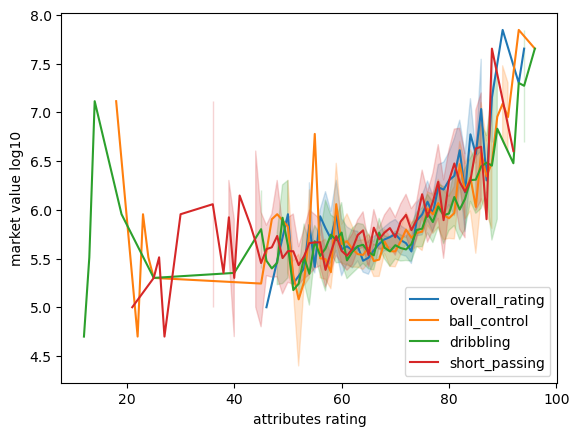

In [28]:
ax = sns.lineplot(data = final_df_attack, x = 'overall_rating', y = 'market_log10', label = 'overall_rating')
sns.lineplot(data = final_df_attack, x = 'ball_control', y = 'market_log10', label = 'ball_control')
sns.lineplot(data = final_df_attack, x = 'dribbling', y = 'market_log10', label = 'dribbling')
sns.lineplot(data = final_df_attack, x = 'short_passing', y = 'market_log10', label = 'short_passing')

ax.set(xlabel='attributes rating', ylabel='market value log10')
plt.legend()

We can observe that when attribute rarings are below 50, there is almost no predictability in the data as the variance is really big. Hence, in future predicting we can discard those attributes if they're below 50.

To see the trend more clearly, we have included the following aggregation bar graph showing the average market value across the different ranges of attribute ratings for overall rating, ball control, dribbling, and short passing.

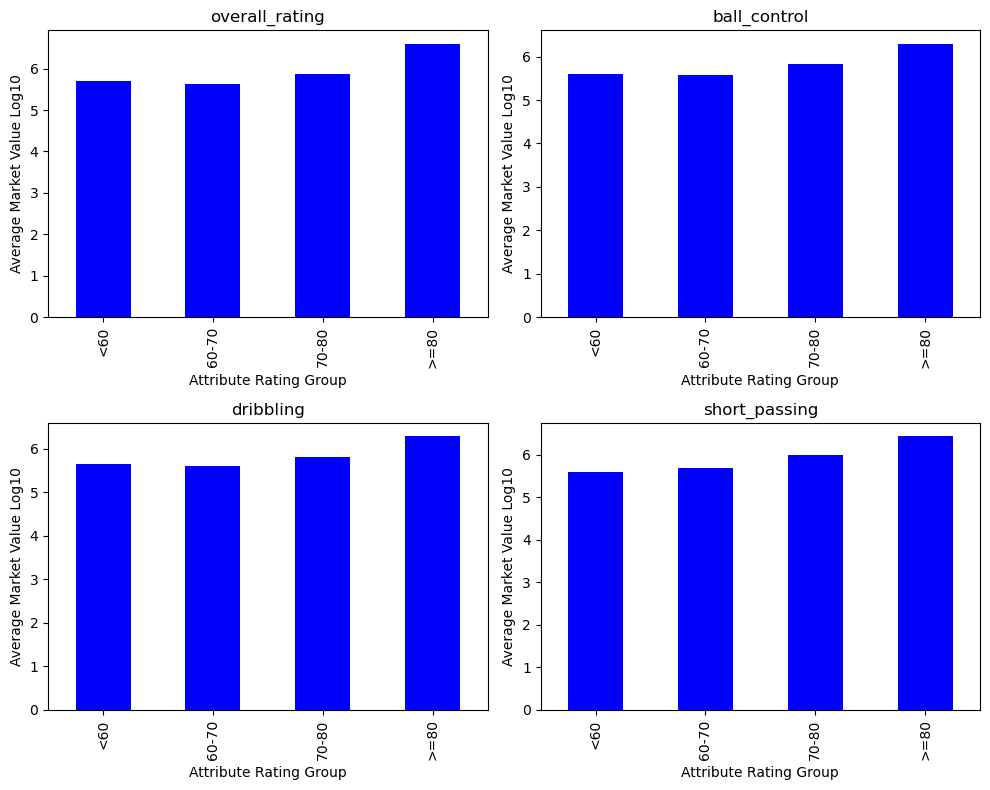

In [44]:
# Function for making aggregation graphs
def generate_attribute_bar_plots(data, attributes, ranges, labels):
    # Create a figure with subplots for each attribute
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))

    # Iterate over each attribute and create a bar plot in the corresponding subplot
    for i, attribute in enumerate(attributes):
        ax = axs[i // 2, i % 2]
        
        # Group the data by rating group and calculate the average market value log10 for each group
        average_values = data.groupby(pd.cut(data[attribute], bins=ranges, labels=labels))['market_log10'].mean()
        
        # Create a bar plot using the average market value log10 data
        average_values.plot(kind='bar', ax=ax, color='blue')
        
        ax.set_title(attribute)
        ax.set_xlabel('Attribute Rating Group')
        ax.set_ylabel('Average Market Value Log10')

    # Adjust the layout of subplots
    plt.tight_layout()

    # Show the plot
    plt.show()

attributes = ['overall_rating', 'ball_control', 'dribbling', 'short_passing']
ranges = [0, 60, 70, 80, float('inf')]
labels = ['<60', '60-70', '70-80', '>=80']
generate_attribute_bar_plots(final_df_attack, attributes, ranges, labels)

In [33]:
print("Midfielder")
print(ranked_correlations_mid[4:9])

Midfielder
national_team_players    0.549826
stadium_seats            0.448047
age                      0.440783
ball_control             0.303936
short_passing            0.291397
Name: market_log10, dtype: float64


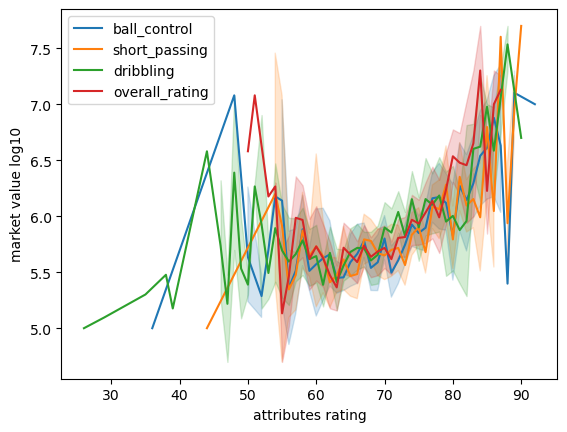

In [45]:
ax = sns.lineplot(data = final_df_mid, x = 'ball_control', y = 'market_log10', label = 'ball_control')
sns.lineplot(data = final_df_mid, x = 'short_passing', y = 'market_log10', label = 'short_passing')
sns.lineplot(data = final_df_mid, x = 'dribbling', y = 'market_log10', label = 'dribbling')
sns.lineplot(data = final_df_mid, x = 'overall_rating', y = 'market_log10', label = 'overall_rating')

ax.set(xlabel='attributes rating', ylabel='market value log10')
plt.legend()

We can observe that when attribute ratings are lower than 55 or higher than 85, there is significantly more variability in our data. Therefore, in future predicting we can discard those values as they're noise in the data.

To see the trend more clearly, we have included the following aggregation bar graph showing the average market value across the different ranges of attribute ratings for overall rating, ball control, dribbling, and short passing.

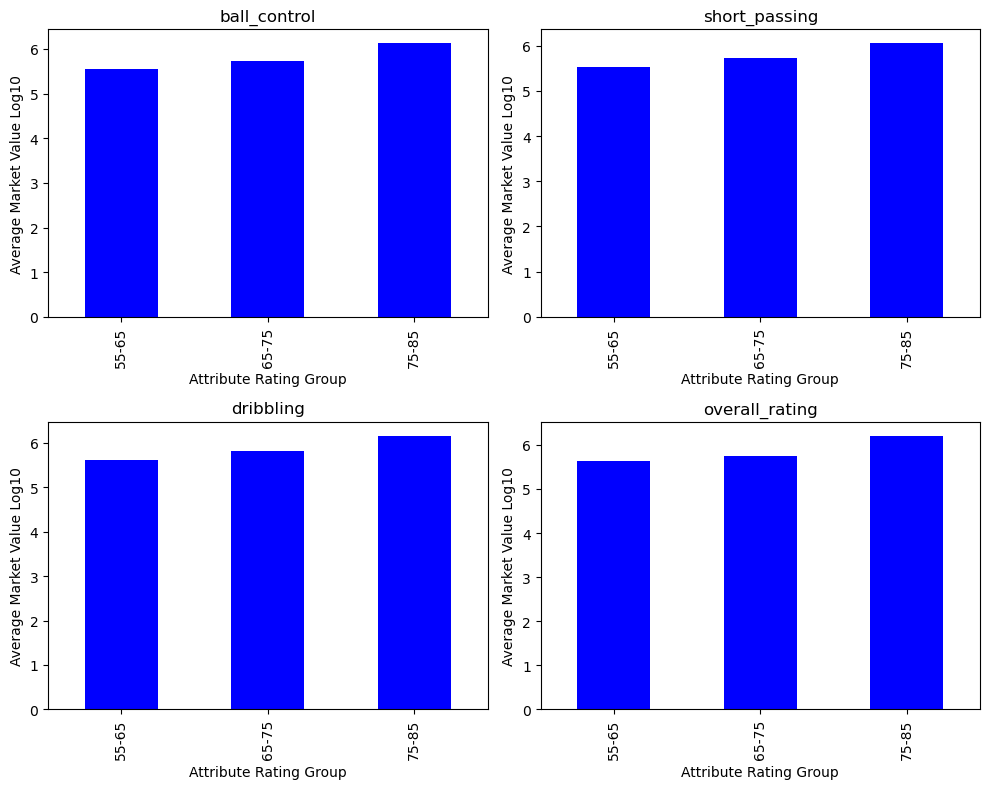

In [46]:
attributes = ['ball_control', 'short_passing', 'dribbling', 'overall_rating']
ranges = [55, 65, 75, 85]
labels = ['55-65', '65-75', '75-85']
generate_attribute_bar_plots(final_df_mid, attributes, ranges, labels)

In [47]:
print("Defender")
print(ranked_correlations_def[4:9])

Defender
national_team_players    0.541358
age                      0.464664
stadium_seats            0.435982
foreigners_number        0.300647
foreigners_percentage    0.287906
Name: market_log10, dtype: float64


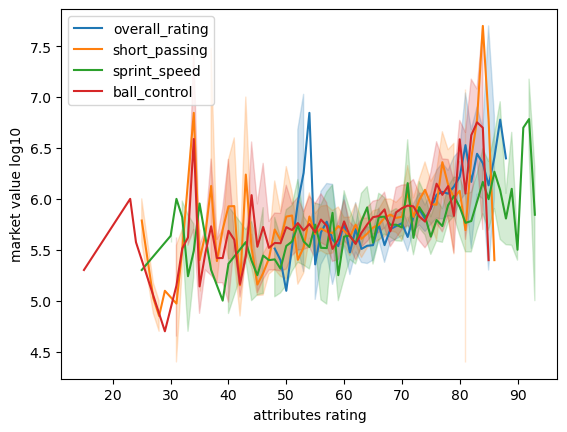

In [48]:
ax = sns.lineplot(data = final_df_def, x = 'overall_rating', y = 'market_log10', label = 'overall_rating')
sns.lineplot(data = final_df_def, x = 'short_passing', y = 'market_log10', label = 'short_passing')
sns.lineplot(data = final_df_def, x = 'sprint_speed', y = 'market_log10', label = 'sprint_speed')
sns.lineplot(data = final_df_def, x = 'ball_control', y = 'market_log10', label = 'ball_control')

ax.set(xlabel='attributes rating', ylabel='market value log10')
plt.legend()

In the above graph, we could also observe that the data fluctuates much more heavily with a large variance when attribute ratings are below 40 and above 80. Therefore, like the above, we discard those attributes if they go below 40 or above 80. In addition, given that the overall rating starts at 50 or so right away, we'll also need to scale it differently than others when we do our predictive analysis.

To see the trend more clearly, we have included the following aggregation bar graph showing the average market value across the different ranges of attribute ratings for overall rating, ball control, dribbling, and short passing.

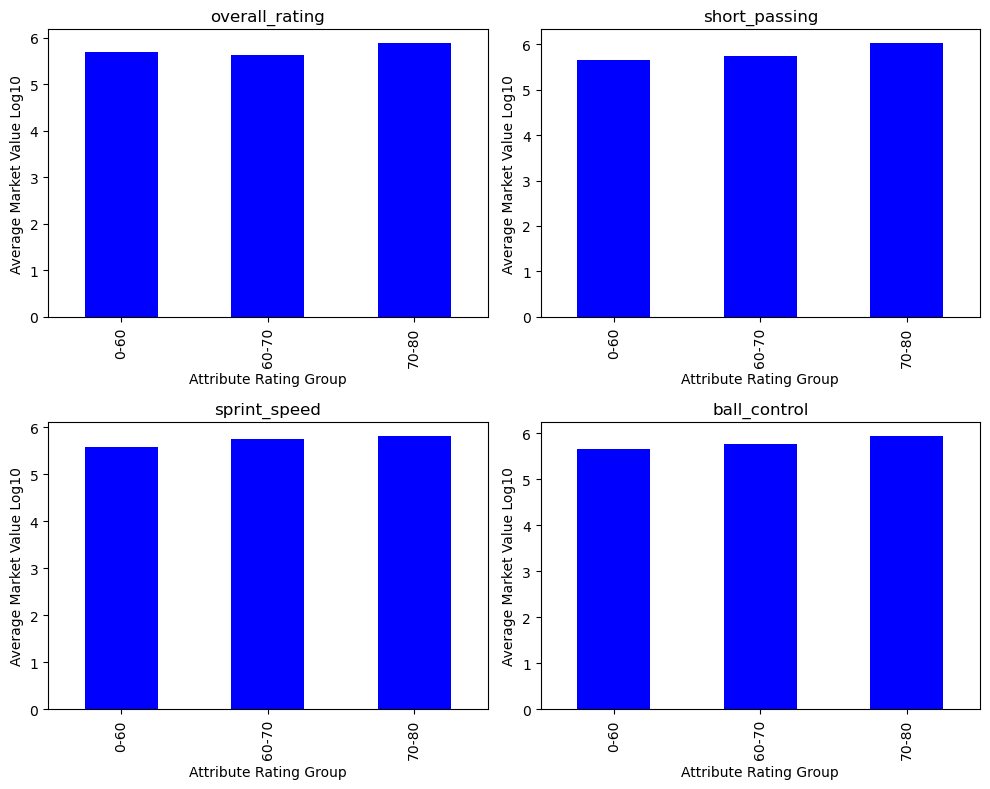

In [49]:
attributes = ['overall_rating', 'short_passing', 'sprint_speed', 'ball_control']
ranges = [0, 60, 70, 80]
labels = ['0-60', '60-70', '70-80']
generate_attribute_bar_plots(final_df_def, attributes, ranges, labels)

In [50]:
print("Goalkeeper")
print(ranked_correlations_attack[4:9])

Goalkeeper
national_team_players    0.555320
stadium_seats            0.442302
age                      0.386281
overall_rating           0.320736
ball_control             0.301146
Name: market_log10, dtype: float64


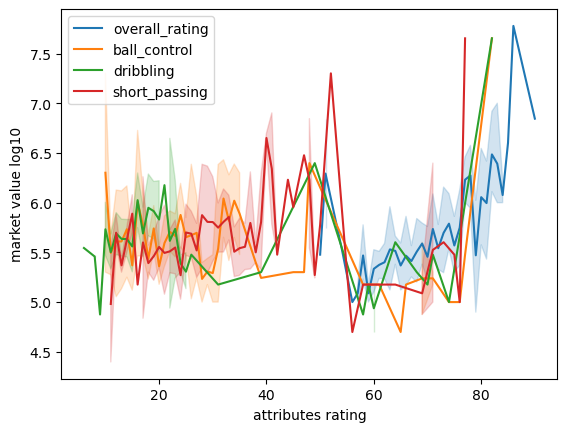

In [51]:
ax = sns.lineplot(data = final_df_goal, x = 'overall_rating', y = 'market_log10', label = 'overall_rating')
sns.lineplot(data = final_df_goal, x = 'ball_control', y = 'market_log10', label = 'ball_control')
sns.lineplot(data = final_df_goal, x = 'dribbling', y = 'market_log10', label = 'dribbling')
sns.lineplot(data = final_df_goal, x = 'short_passing', y = 'market_log10', label = 'short_passing')

ax.set(xlabel='attributes rating', ylabel='market value log10')
plt.legend()

In the graph above, again just like all the above, there is too much variability when attributes ratings are between 40 and 60, so we discard those ateibutes if they're between 40 and 60. ALso, the attribute ratings for ball control, dribbling and short passing all start way earlier in the graph than overall rating, so we'll need to scale it differently. In addition to that, there does seem to be a gap between players with attribute ratings lower than 50 and those with ratings higher than 50. Therefore, when we do our predictive analysis, we might need to treat the two segments differently in order to predict market values for goalkeepers.

To see the trend more clearly, we have included the following aggregation bar graph showing the average market value across the different ranges of attribute ratings for overall rating, ball control, dribbling, and short passing.

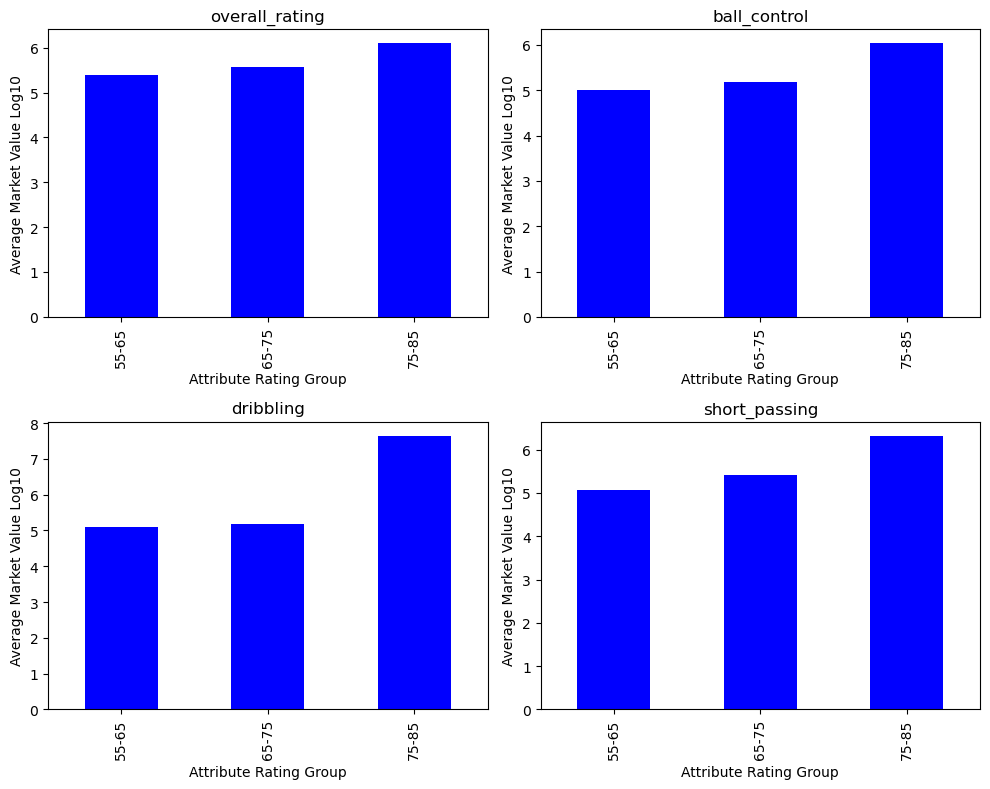

In [52]:
attributes = ['overall_rating', 'ball_control', 'dribbling', 'short_passing']
ranges = [55, 65, 75, 85]
labels = ['55-65', '65-75', '75-85']
generate_attribute_bar_plots(final_df_goal, attributes, ranges, labels)

# Results & Predictions

Now we will split our dataset into training set, validation set, and test set. The training set data will be use to train the model on various hyperparameter, and the validation set will be use to select the most accurate heyperparameter. Then together with the training set and validation set, we will train the model again and apply on the test set to see the accuracy.

First, we decided to turn this into a classfication problem, where we break out the market value of players into groups, and try to classify a player's market value group given the attributes of the player

In [32]:
# Use the 25th, 50th, 75th percentaile to decide which group does a player belong to
twentyfifth = final_df['market_value_in_eur'].quantile(q = 0.25)
fifty = final_df['market_value_in_eur'].quantile(q = 0.5)
seventyfifth = final_df['market_value_in_eur'].quantile(q = 0.75)

# Define the four classes
classA = "Market value: " + str(final_df['market_value_in_eur'].min()/1000) + "K ~ " + str(twentyfifth/1000) + "K"
classB = "Market value: " + str(twentyfifth/1000) + "K ~ " + str(fifty/1000) + "K"
classC = "Market value: " + str(fifty/1000) + "K ~ " + str(seventyfifth/1000) + "K"
classD = "Market value: " + str(seventyfifth/1000) + "K ~ " + str(final_df['market_value_in_eur'].max()/1000) + "K"


- Calculation of Percentiles:

We calculates specific percentile values (25th, 50th, and 75th) of the 'market_value_in_eur' column in the DataFrame. This represents the calculation of certain statistical thresholds which split the data into quartiles.

- Definition of Market Value Categories:

Based on the calculated percentile values, players are classified into four categories. Each category corresponds to a range of market values, defined by the percentiles and the extreme values (minimum and maximum).

In [33]:

def networth_category(networth):
    if networth >= final_df['market_value_in_eur'].min() and networth <= twentyfifth:
        return 0
    elif networth > twentyfifth and networth <= fifty:
        return 1
    elif networth > fifty and networth <= seventyfifth:
        return 2
    else:
        return 3
    
    
# Apply the function and examine the group counts
final_df['networth_category'] = final_df['highest_market_value_in_eur'].apply(networth_category)
final_df['networth_category'].value_counts()

We create the function to categorizes the market value of a player into one of four categories (0, 1, 2, or 3) depending on the percentile thresholds calculated earlier (twentyfifth, fifty, seventyfifth).

Then we apply it to the 'highest_market_value_in_eur' column in the DataFrame to create a new 'networth_category' column. Afterward, the value_counts method is used to show the number of players in each category.



In [35]:
# Redefine the 4 posisitons dataframe
final_df_attack = final_df[final_df['position'] == 'Attack']
final_df_mid = final_df[final_df['position'] == 'Midfield']
final_df_def = final_df[final_df['position'] == 'Defender']
final_df_goal = final_df[final_df['position'] == 'Goalkeeper']

final_df['position'].value_counts()


Attack        1232
Defender      1044
Midfield       728
Goalkeeper     305
Name: position, dtype: int64

Creating where each subset corresponds to one specific position: 'Attack', 'Midfield', 'Defender', and 'Goalkeeper'. The rows in each new dataframe meet the condition that the player's position matches the specific position.

 This can help understand the composition of the player population, for example, how many attackers, midfielders, defenders, and goalkeepers there are in the dataset.

In [36]:
# Split the data into 80% training set, 20% test set
col_keep = ['potential', 'age', 'overall_rating', 'ball_control', 'dribbling', 'short_passing', 'networth_category']
test_keep = ['networth_category','potential', 'national_team_players', 'stadium_seats', 'age', 'overall_rating', 'foreigners_number', 'foreigners_percentage', 'reactions', 'vision', 'short_passing', 'ball_control', 'long_passing', 'dribbling', 'average_age', 'acceleration', 'sprint_speed', 'agility', 'positioning', 'curve', 'squad_size', 'finishing', 'stamina', 'crossing', 'long_shots', 'shot_power']
final_df_attack = final_df_attack.dropna(subset=['networth_category'])
X = final_df_attack
X = final_df_attack[test_keep]

X = X.dropna(axis = 0, how = 'any')
X = X[X[col_keep] >= 60]
y = X['networth_category']
X = X.drop(columns=['networth_category'])

final_df_attack.shape
X.shape
y

206      NaN
334      NaN
350      NaN
411      NaN
656      NaN
          ..
118685   NaN
118693   NaN
118719   NaN
118770   NaN
118835   NaN
Name: networth_category, Length: 1183, dtype: float64

In [37]:
final_df_attack = final_df_attack.dropna(subset=['networth_category'])
X = final_df_attack.drop(columns=['networth_category', 'highest_market_value_in_eur','player_name','position','market_value_in_eur','market_log10'])
y = final_df_attack['networth_category']
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_val = imputer.transform(X_val)
X_train_val = imputer.fit_transform(X_train_val)
X_test = imputer.transform(X_test)

 In this step we are doing the necessary data cleaning, defining predictor and target variables, and providing some basic exploratory data information. The actual data splitting into training and test sets isn't performed in this part of the code.

In [38]:
#feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_train_val = scaler.transform(X_train_val)
X_test = scaler.transform(X_test)

 Implementing feature scaling to normalize the features in the training, validation, and testing datasets. The scaler is fitted only on the training data to avoid data leakage. This preprocessing step can help improve the performance of many machine learning algorithms.

In [39]:
#feature selection
selector = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=20, step=1)
selector = selector.fit(X_train, y_train)
X_train = selector.transform(X_train)
X_val = selector.transform(X_val)
X_train_val = selector.transform(X_train_val)
X_test = selector.transform(X_test)

We use the Recursive Feature Elimination (RFE) method to select the top 20 most important features. This process simplifies the model, reduces overfitting, and enhances the model's performance by eliminating irrelevant features.

In [40]:
#hyperparameter tuning
param_grid = {'max_depth': list(range(1, 11)), 'min_samples_split': list(range(2, 11))}
dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(X_train_val, y_train_val)
print(grid_search.best_params_)

{'max_depth': 2, 'min_samples_split': 2}


We use the Grid search method to find the optimal hyperparameters for the Decision Tree Classifier. It searches across a specified range of hyperparameters and uses cross-validation to identify the parameters that produce the best model performance.

In [41]:
#random Forest
param_grid_rf = {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10, 15]}
rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5)
grid_search_rf.fit(X_train_val, y_train_val)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'n_estimators': [100, 200, 300]})

 Random Forest Classifier set up and trained

In [42]:
#logistic Regression
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
lr = LogisticRegression(random_state=42)
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5)
grid_search_lr.fit(X_train_val, y_train_val)
y_test_pred_dt = grid_search.best_estimator_.predict(X_test)
y_test_pred_rf = grid_search_rf.best_estimator_.predict(X_test)
y_test_pred_lr = grid_search_lr.best_estimator_.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_test_pred_dt)
accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
accuracy_lr = accuracy_score(y_test, y_test_pred_lr)

/Users/xiaohui_lu/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/xiaohui_lu/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

Carrying out the logistic regression model set up, hyperparameter tuning, prediction, and accuracy calculation:

In [43]:
print("Decision Tree Accuracy: {:.2f}%".format(accuracy_dt * 100))
print("Random Forest Accuracy: {:.2f}%".format(accuracy_rf * 100))
print("Logistic Regression Accuracy: {:.2f}%".format(accuracy_lr * 100))

Decision Tree Accuracy: 75.30%
Random Forest Accuracy: 74.49%
Logistic Regression Accuracy: 72.87%


# SVM Accuracy

In [44]:
from sklearn import svm

param_grid_svm = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01], 'kernel': ['rbf', 'linear']}
svm = svm.SVC(random_state=42)
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5)
grid_search_svm.fit(X_train_val, y_train_val)
y_test_pred_svm = grid_search_svm.best_estimator_.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_test_pred_svm)
print("SVM Accuracy: {:.2f}%".format(accuracy_svm * 100))


SVM Accuracy: 74.09%


# K-Nearest Neighbors Accuracy

In [45]:
from sklearn.neighbors import KNeighborsClassifier

param_grid_knn = {'n_neighbors': list(range(1, 31))}
knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5)
grid_search_knn.fit(X_train_val, y_train_val)
y_test_pred_knn = grid_search_knn.best_estimator_.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_test_pred_knn)
print("K-Nearest Neighbors Accuracy: {:.2f}%".format(accuracy_knn * 100))


K-Nearest Neighbors Accuracy: 77.33%


# AdaBoost Accuracy

In [46]:
from sklearn.ensemble import AdaBoostClassifier

param_grid_ada = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]}
ada = AdaBoostClassifier(random_state=42)
grid_search_ada = GridSearchCV(ada, param_grid_ada, cv=5)
grid_search_ada.fit(X_train_val, y_train_val)
y_test_pred_ada = grid_search_ada.best_estimator_.predict(X_test)
accuracy_ada = accuracy_score(y_test, y_test_pred_ada)
print("AdaBoost Accuracy: {:.2f}%".format(accuracy_ada * 100))


AdaBoost Accuracy: 74.09%


# Ethics & Privacy

We address the privacy and transparency issues by using public data which does not involve violation of disclosed personal information. All the dataset we use are from Kaggle with acknowledgement  on where they collect such data, which is transfermarkt and fifa data from 2008 to 2016.

There are multiple factors for potential biased analysis. To begin with, bias on player attributes may affect the networth of the player. Therefore, we abandon unrelated biased attributes such as race and nationality. The analysis is purely based on the skill rather than other confusing variables for accuracy. The data from Kaggle are collected from  transfermarkt and FIFA, which is one of the largest sport website in Europe for player transfer information and one of the most popular website for player attributes. This datasets build up the credibility and the relationship from the outcome of our analysis could be accurately reflected without worrying about the untrusted resource at the beginning.

Furthermore, out-dated data could affect the accuracy of predicting the net worth of the player. As I mentioned above, to overcome the biased data, we required the most updated net worth dataset for European player, which is still updating weekly . We came across several datasets that suit the purpose of our project, but they lost the representativeness due to no update.  To achieve better accuracy, we need to abandon the out-dated data.


# Conclusion & Discussion

From our analysis, the models perform moderately well in predicting a soccer player’s net worth in transfer market value based on FIFA player attributes, with the K-nearest neighbors model producing the highest accuracy of 77.33%. Our hypothesis that attributes such as overall rating and potential would have the most significant impact on a player’s net worth in the transfer market is supported. In addition, we discover that other variables also have notable influences. This includes ball control, age, and so on. These results provide a vital analysis for valuing soccer players and it could potentially help decision-making processes within the EU sports industry.

Limitations: 
Despite the interesting findings and supported hypothesis, there are several limitations in our project. To begin with, the model’s accuracy was not perfect, which means there is potential for improvement. We conducted different models for predictions and the first version of models, specifically the decision tree classifier and random forest classifier, only yielded around 30% accuracy. With the help of TA (thank to Heeket Mehta), we successfully yield around 70%+ accuracy by parameter tuning and improving the new model. If time allows, we could definitely find a better way for higher accuracy. 

Moreover, there is incoherence between player attributes and the current net worth of a player. Our group member, Alex, finds out the FIFA attributes dataset only contains the attributes of a soccer player during his prime time. However, our net worth from the Transfermrkt dataset is updated to the current net worth biweekly. For example, Zoran Tosic has outstanding player attributes during his prime time period with over 10 million euros net worth. Based on the Transfermrkt dataset, his net worth is only 200 thousand euros nowadays. Therefore, the incoherent relationship between player attributes and current net worth may result in some false data in prediction. 

Lastly,  soccer players’ net worth are not solely determined by the player’s on-pitch attributes. They are also significant influence by other factors such as market demand, contract duration and even amazing highlight moment rather than overall attributes. There are factors we did not include in our analysis due to the lack of available data, which could result in a less applicable analysis for real-life sport industry. 

Impact to society: 
This project can provide valuable insight to various stakeholders in soccer world in Europe, from clubs to fans. For clubs and agents. our models can serve as a tool for initial evaluation, providing a subjective estimate of a plyer’s worth based on their sole attributes. For fans, this research can lead to a deeper understanding of players’ valuation, or even give more exposure to not well-known players. Also, soccer players could reflect to their attributes for improvement or use this information as a benchmark to understand how their performance could influence their market value. We believe that our analysis could stimulate further research for data-driven decision-making in soccer industry, promoting efficiency and fairness in the relationship between player’s performance and market value in the transfer market.


# Team Contributions

### Justin He 

Mainly responsible for brainstorming and implementing the coding section, such as designing what kinds of graphs we should use during the EDA checkpoint, and building the prediction model at the end.

### Yilin Song

Coding logic and implementation, as well as optimizing the algorithm to reach the ideal states. Co-worked on data cleaning, EDA sketch, and prediction model sketch and optimization.

### Runze Wang

Mainly responsible for Dataset, Ethics& Privacy and Conclusion. Co-worked on data cleaning and improve descriptions and comments between code blocks.


### Cheng Qian

Mainly responsible for hypothesis, background and prior work, and EDA improvements with words and graphs.

### Xiaohui Lu

Code comment checking and interpolating, sum up the work and make a video for the project.